# 21M.387 Fundamentals of Music Processing
## Lab9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['image.interpolation'] = 'nearest'

fmp.documentation_button()

## Exercise 1

Write the function `median(x)` that takes a numpy 1D array and returns the median of the list of numbers. Remember that if the list has an even number of items, the median is the average of the two middle values.

You can compare your answer to the results of `np.median()` to see if you get the same answer.

In [56]:
def median(x):
    y = sorted(x)
    n = len(y)
    
    if n % 2 != 0:
        return float(y[int(n/2)])
    
    return (y[int((n-1)/2)] + y[int((n+1)/2)]) / 2.0

a = np.array([1,3,4,2,7,5,5,5,2])   # odd-length list
b = np.array([1,3,4,2,7,5,5,5,2,8]) # even-length list

print(f'mine={median(a)}, np={np.median(a)}')
print(f'mine={median(b)}, np={np.median(b)}')


mine=4.0, np=4.0
mine=4.5, np=4.5


In [ ]:
connect_to_queue()

## Exercise 2

Create the function `median_filter(x, L)` that applies a median filter to signal $x[n]$ to produce $\tilde{x}[n]$. $\tilde{x}[n_0]$ is the median of a length $L$ window of $x[n]$ centered at $n_0$. In other words:

$$ \tilde{x}[n_0] = \text{median} \lbrace x[n_0 - h], \dots , x[n_0 + h] \rbrace, h = {L-1 \over 2} $$



Inputs are:

- `x`, the signal
- `L`, the median filter window length.



Test it with the the arrays `a` and `b` above (using an odd number for `L`). You should get the same results via `medfilt()` from `scipy.signal`

In [71]:
from scipy.signal import medfilt

def median_filter(x, L):
    p = np.pad(x, (L-1)//2)
    n = len(x)
    out = []

    for i in range(L//2,n+(L//2)):
        w = p[i-(L//2):i+(L//2)+1]
        out.append(median(w))
        
    return np.array(out)


print(median_filter(a, 7))
print(medfilt(a, 7))
print()
print(median_filter(b, 3))
print(medfilt(b, 3))

[1. 2. 3. 4. 5. 5. 5. 5. 2.]
[1. 2. 3. 4. 5. 5. 5. 5. 2.]

[1. 3. 3. 4. 5. 5. 5. 5. 5. 2.]
[1. 3. 3. 4. 5. 5. 5. 5. 5. 2.]


In [ ]:
connect_to_queue()

## Exercise 3
- Plot the signal `x`. 
- Determine the smallest odd value of `L` needed to suppress the bump in the middle of the signal with a median filter.
- Plot that median-filtered version of `x` 

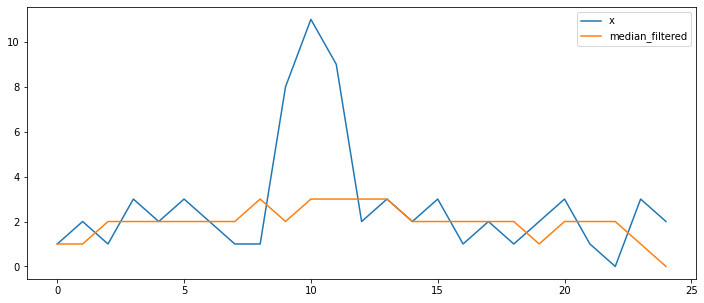

In [84]:
x = np.array([1,2,1,3,2,3,2,1,1,8,11,9,2,3,2,3,1,2,1,2,3,1,0,3,2])

plt.plot(x, label='x')
plt.plot(median_filter(x,7), label='median_filtered')
plt.legend()
plt.show()

In [ ]:
connect_to_queue()

## Exercise 4

- Load the signal $x[n]$ below and listen to it.
- Calculate $X[k]$, the Fourier Transform
- Plot $\vert X[k] \vert$
- Calculate $x_r[n]$ by using the inverse Fourier Transform (see `np.fft.irfft`)
- Plot $\Delta_x[n] = \vert x_r[n] - x[n] \vert$. Hopefully this signal is very close to 0.

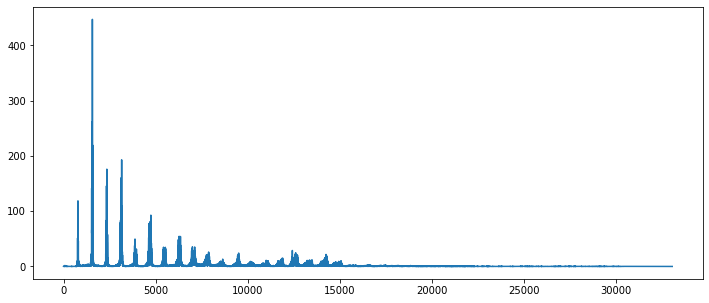

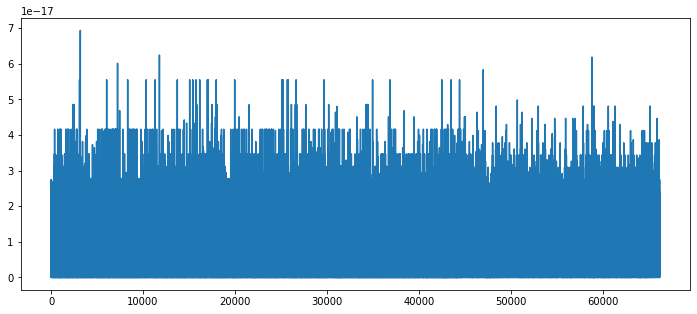

In [107]:
x = fmp.load_wav("audio/violin_c4.wav")
fs = 22050
display(ipd.Audio(x, rate=fs))

ft = np.fft.rfft(x)
plt.plot(np.abs(ft))
plt.show()

ift = np.fft.irfft(ft)
d = np.abs(ift - x)
#print(f'\nmax value: {np.max(d)}')
plt.plot(d)
plt.show()

Create a modified spectrum $X'[k]$ in each of the following 3 ways:
1. Multiply $X[k]$ by a linear ramp that goes from 0 to 1 across the range of $X[k]$.
2. Zero out the frequencies in the range $k \in [3000:8000]$
3. Zero out the frequencies in the range $k \in [1000:10000]$

For each modification, plot the $X'[k]$ and listen to the reconstructed $x'_r[n]$  
Do these modified sounds sound like English vowels?

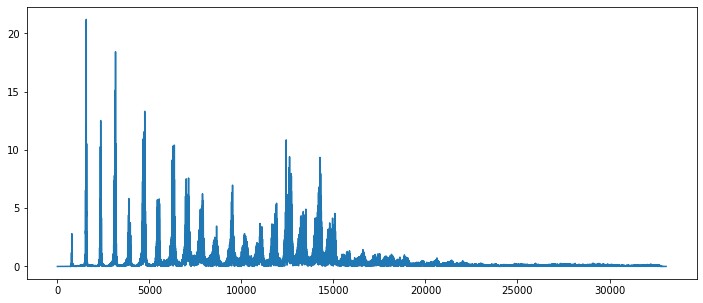

You could say it sounds a bit like a "AHHH", but still pretty much a violin:


In [126]:
Xm = ft * np.linspace(0.0, 1.0, len(ft))
plt.plot(np.abs(Xm))
plt.show()

print('You could say it sounds a bit like a "AHHH", but still pretty much a violin:')
display(ipd.Audio(np.fft.irfft(Xm), rate=fs))

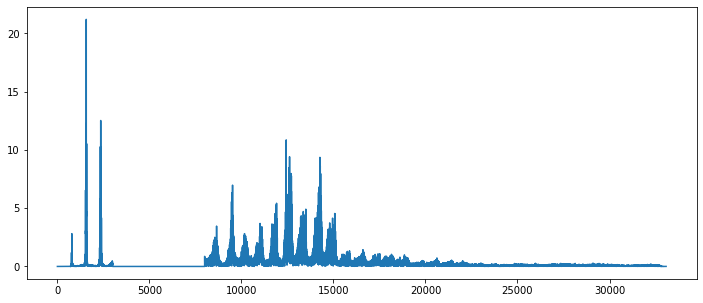

Less violin sounding now, and sounds like a "OHH" vowel:


In [127]:
Xm[3000:8000]=0
plt.plot(np.abs(Xm))
plt.show()

print('Less violin sounding now. Sounds like a "OHH" vowel:')
display(ipd.Audio(np.fft.irfft(Xm), rate=fs))

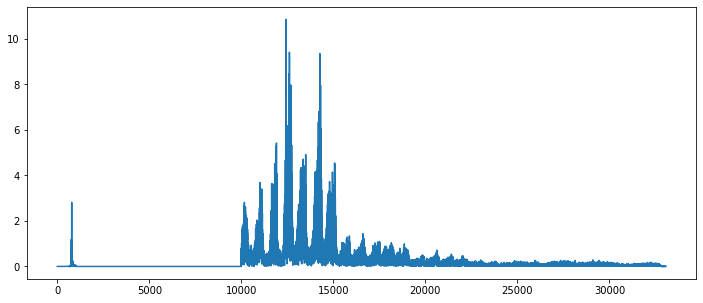

Cannot tell it was originally a violin. Sounds like a "E" vowel:


In [128]:
Xm[1000:10000]=0
plt.plot(np.abs(Xm))
plt.show()

print('Cannot tell it was originally a violin. Sounds like a "E" vowel:')
display(ipd.Audio(np.fft.irfft(Xm), rate=fs))

In [ ]:
connect_to_queue()

## Exercise 5

- Choose a song that has harmonic and percussive elements. Save the first 30 seconds of the song as a mono 22k wave file. Or, you can use the song I chose if you like _Pink Floyd_.
- Load the song and create the power spectrogram using `fmp.stft()` with $N = 2048$ and $H = N/2$.
- Create the harmonic and percussive median-filtered versions of the spectrogram using `medfilt()` from `scipy.signal`:
 - Note that you can use `medfilt()` on the entire spectrogram matrix with the `kernel_size` argument. 
 - Use `kernel_size=(1, L_h)` for a horizontal median filter.
 - Use `kernel_size=(L_v, 1)` for a vertical median filter.
 - For $L_h$ and $L_v$, use some values you think are reasonable. You can always modify them later to improve your results.
- Plot the 3 spectrograms (regular, harmonic filtered, percussive filtered). You can use `plot_spectrogram()`


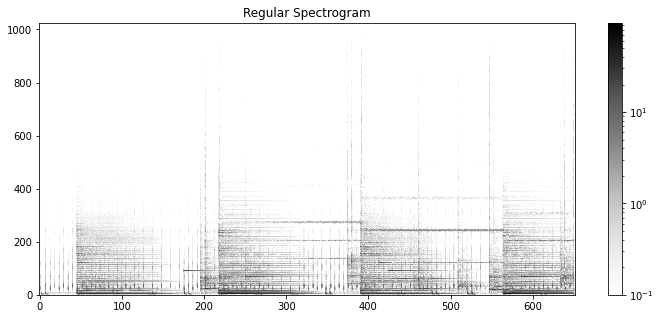

interactive(children=(IntSlider(value=13, description='L_h', max=27, min=1, step=2), IntSlider(value=27, descr…

In [207]:
snd = fmp.load_wav("audio/pinkfloyd_time_excerpt.wav")
fs = 22050.
display(ipd.Audio(snd, rate = fs))

fft_len = 2048
hop_size = fft_len // 2
# power spectrogram:
stft = fmp.stft(snd, fft_len, hop_size)
spec = np.abs(stft) ** 2

fmp.plot_spectrogram(np.abs(stft), cmap='Greys')
plt.title("Regular Spectrogram")

@interact(L_h=(1,27,2), L_v=(1,27,2))
def plot_filter(L_h=13, L_v=27):
    spec_h = medfilt(spec, (1, L_h))
    fmp.plot_spectrogram(spec_h[0:300], cmap='Greys', colorbar=False)
    plt.title(f"Harmonic Median Filtered Spectrogram with L_h={L_h}")
    plt.show()
    spec_p = medfilt(spec, (L_v, 1))
    fmp.plot_spectrogram(spec_p[0:300], cmap='Greys', colorbar=False)
    plt.title(f"Percussive Median Filtered Spectrogram with L_v={L_v}")
    plt.show()

In [ ]:
connect_to_queue()

## Exercise 6a

- Create a harmonic and percussive binary mask using the filtered spectrograms.
- Use these masks to create the harmonic and percussive STFTs (note: these should be complex valued)
- Plot these masked versions.

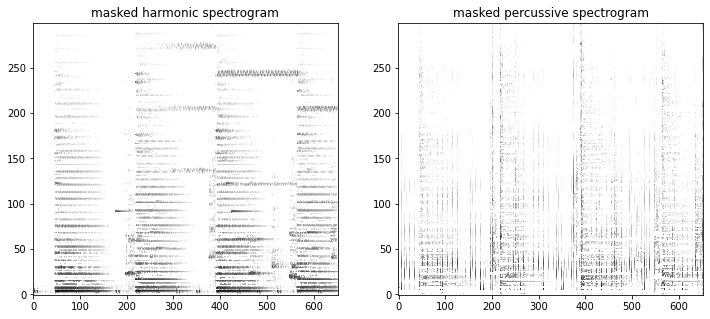

In [208]:
L_h = 15
L_v = 27
spec_h = medfilt(spec, (1, L_h))
spec_p = medfilt(spec, (L_v, 1))

# create binary masks
bmask_h = spec_h >= spec_p
bmask_p = np.logical_not(bmask_h)

# apply masks
spec_h = bmask_h * spec
spec_p = bmask_p * spec

plt.subplot(1,2,1)
fmp.plot_spectrogram(spec_h[0:300,:], cmap='Greys', colorbar=False)
plt.title("masked harmonic spectrogram")
plt.subplot(1,2,2)
plt.title("masked percussive spectrogram")
fmp.plot_spectrogram(spec_p[0:300,:], cmap='Greys', colorbar=False)

## Exercise 6b

Use `fmp.istft()` to re-synthesize the two audio signals, one from each masked spectrogram.  
Listen to these two audio files.  
How well did the separation work?

If you did not get very good separation, try changing the values of $L$ in Exercise 5.

In [209]:
stft_h = bmask_h * stft
stft_p = bmask_p * stft

snd_h = fmp.istft(stft_h, hop_size)
print("re-synthesized harmonic:")
display(ipd.Audio(snd_h, rate = fs))

snd_p = fmp.istft(stft_p, hop_size)
print("re-synthesized percussive:")
display(ipd.Audio(snd_p, rate = fs))

print('\n\nLow freqs of distorted guitar keep bleeding through on re-synthesized percussive signal, even with really large values of L_v and L_h.')

re-synthesized harmonic:


re-synthesized percussive:




Low freqs of distorted guitar keep bleeding through on re-synthesized percussive signal, even with really large values of L_v and L_h.


In [ ]:
connect_to_queue('checkoff')

## Exercise 7

If you have time before the end of lab...

- Load the following audio, $x[n]$ and listen to it.
- Create the STFT using parameters $N = 4096, H = N/2$
- Plot $\lvert \mathcal{X}[n,k] \lvert$


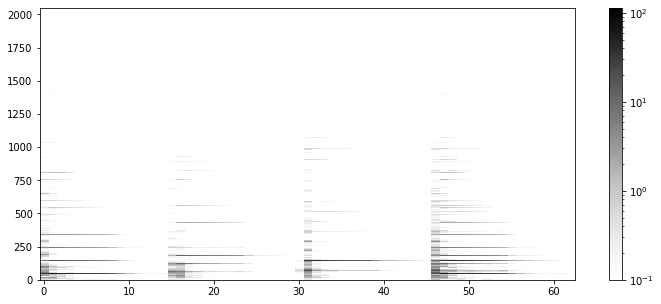

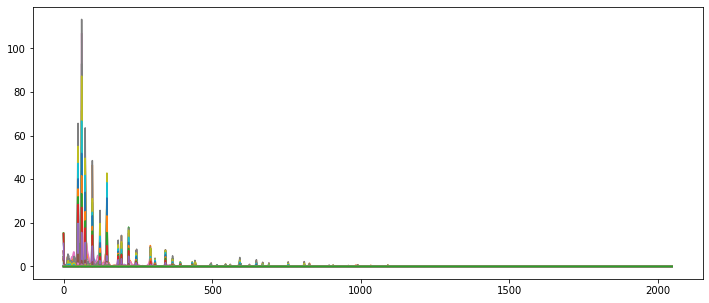

In [210]:
x = fmp.load_wav("audio/piano_arpeg.wav")
display(ipd.Audio(x, rate=fs))

fft_len = 4096
hop_size = fft_len // 2
ex7_stft = fmp.stft(x, fft_len, hop_size)

fmp.plot_spectrogram(np.abs(ex7_stft), cmap='Greys')
plt.show()

plt.plot(np.abs(ex7_stft))
plt.show()

Try to eliminate the middle note (it is an E, pitch=64) by this process:

- Copy $\mathcal{X}[n,k]$ to $\mathcal{X}'[n,k]$
- Modify $\mathcal{X}'[n,k]$ by zeroing out certain values (or ranges of values) of $k$.
- Resynthesize the signal from this modified spectrogram.

In [289]:
ex7_Xm = ex7_stft.copy()

def freq_to_k(f, fft_len, fs):
    return int(f * fft_len / (2.0*np.pi*fs))

# zero out the harmonic series from one pitch below to one above:
n = 10
Eb4_freq = fmp.pitch_to_freq(63)
Eb4_freqs = np.concatenate((np.flip(Eb4_freq / np.arange(1,n)),
                            Eb4_freq * np.arange(2,n)), axis=0)
F4_freq = fmp.pitch_to_freq(65)
F4_freqs = np.concatenate((np.flip(F4_freq / np.arange(1,n)),
                            F4_freq * np.arange(2,n)), axis=0)

for i in range(len(Eb4_freqs)):
    s = int(Eb4_freqs[i] * fft_len / fs)
    e = int(F4_freqs[i] * fft_len / fs)
    ex7_Xm[s:e]=0
    
snd_Xm = fmp.istft(ex7_Xm, hop_size)

print("original audio:")
display(ipd.Audio(x, rate=fs))

print("re-synthesized arpeg: E still not totally gone; C and G were also affected")
display(ipd.Audio(snd_Xm, rate = fs))

original audio:


re-synthesized arpeg: E still not totally gone; C and G were also affected
